In [3]:
import pandas as pd
from DA_KNN import preparar_datos_knn
from KNN import KNNTrainer

In [ ]:
#Partimos del DS inicial

df_polvo = pd.read_csv('df_merged.csv')
df_polvo['Date'] = pd.to_datetime(df_polvo['Date'])
#Se eliminan columnas de direccion de viento (ya estan en numericas en grados) y columna nivel de polvo
df_polvo.drop(columns=['WDir','HWDir', 'Polvo_PM10' ], inplace=True)
# Imputar los valores nulos únicamente en las columnas numéricas
numerical_cols = df_polvo.select_dtypes(include=['number']).columns  # Seleccionar solo columnas numéricas
df_polvo[numerical_cols] = df_polvo[numerical_cols].fillna(df_polvo[numerical_cols].mean())


Mejores parámetros (Optuna): {'n_neighbors': 61, 'weights': 'uniform', 'p': 55.52819362862337}

Evaluación para KNN Optuna:
Matriz de confusión:
[[769  18]
 [ 98  17]]

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.89      0.98      0.93       787
        True       0.49      0.15      0.23       115

    accuracy                           0.87       902
   macro avg       0.69      0.56      0.58       902
weighted avg       0.84      0.87      0.84       902

Accuracy: 0.8713968957871396
F1-score: 0.8402128460110588


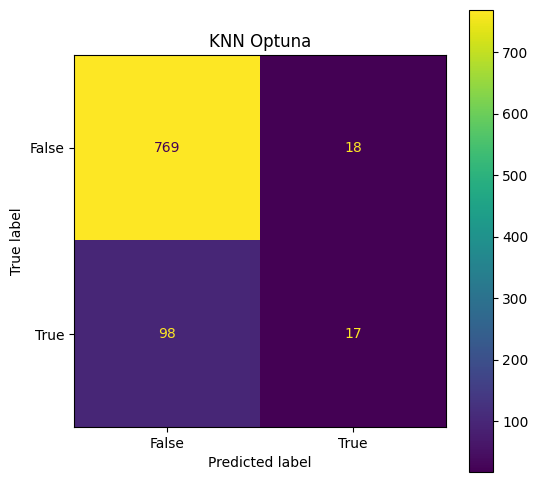

In [ ]:
# Preparación de los datos y escalado para post análisis
X_train, X_test, y_train, y_test = preparar_datos_knn(df_polvo)

# Entrenar el modelo
trainer = KNNTrainer()

# Opción 1: RandomizedSearchCV
best_params = trainer.train_with_random_search(X_train, y_train, {
    "n_neighbors": range(1, 15),
    "weights": ["uniform", "distance"],
    "p": range(1, 10)
})
print("Mejores parámetros (RandomizedSearchCV):", best_params)

# Evaluacion RD search
trainer.evaluar_modelo(X_test, y_test, nombre="KNN Random Search")

# Opción 2: Optuna (descomentar para usar esta opción)
# best_params = trainer.train_with_optuna(X_train, y_train, n_trials=50)
# print("Mejores parámetros (Optuna):", best_params)

# Evaluacion con Optuna:
# trainer.evaluar_modelo(X_test, y_test, nombre="KNN Optuna")
